# Tarea 1 - Jose Adrian Castillo Sierra

## Preprocesamiento de Texto

Primero se realiza la instalacion de la libreria de extraxion para la API de reddit. Utilizaremos la libreria de PRAW para realizar el crawling de los post recientes.

In [5]:
!pip install praw

Se requiere una cuenta activa de reddit, asi como inscribir para obtener una cuenta de desarrollador en el siguiente [link](https://www.reddit.com/prefs/apps).

In [3]:
import praw

user = '1' # usuario de reddit
password = '2' # contrasenia de reddit
clientId = '3' # clave personal de desarrollador
secret = '4' # clave de la aplicacion/script obnetido al inscribirse como desarrollador

reddit = praw.Reddit(
    client_id=clientId,
    client_secret=secret,
    password=password,
    user_agent="analysis",
    username=user,
)

Se obtienen los comentarios de los post de los sub-Reddit mas activos en Mexico. y los guardamos dentro de un archivo txt

In [4]:
with open('reddit.txt', 'w+') as f:        
    subreddit = reddit.subreddit("mexico")
    for s in subreddit.hot(limit=500):
        submision = reddit.submission(s.id)
        for comment in submision.comments.list():
            try:
                f.write(comment.body)
            except:
                continue

Leemos el documento de texto generado con anterioridad, con el fin de comenzar con el analisis de texto.

In [5]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def tokenize_data(text):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokenized_text = tokenizer.tokenize(text)
    return tokenized_text

def remove_stop_words(tokenized_text):
    stop_words = set(stopwords.words('spanish'))
    stop_words.add(' ')
    return [token.lower() for token in tokenized_text if token not in stop_words]


def normalize(tokenized_text):
    stem = nltk.stem.SnowballStemmer('spanish')
    return " ".join([stem.stem(token) for token in tokenized_text]).strip()


def remove_garbage(text):
    garbage = "~`!@#$%^&*()_-+={[}]|\:;'<,>.?/"
    text = "".join([char for char in text if char not in garbage]).strip()
    return text

def remove_whitespace(text):
    text_list = text.split(' ')
    text_list = [word for word in text_list if word != '']
    text = ' '.join(text_list).strip()
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


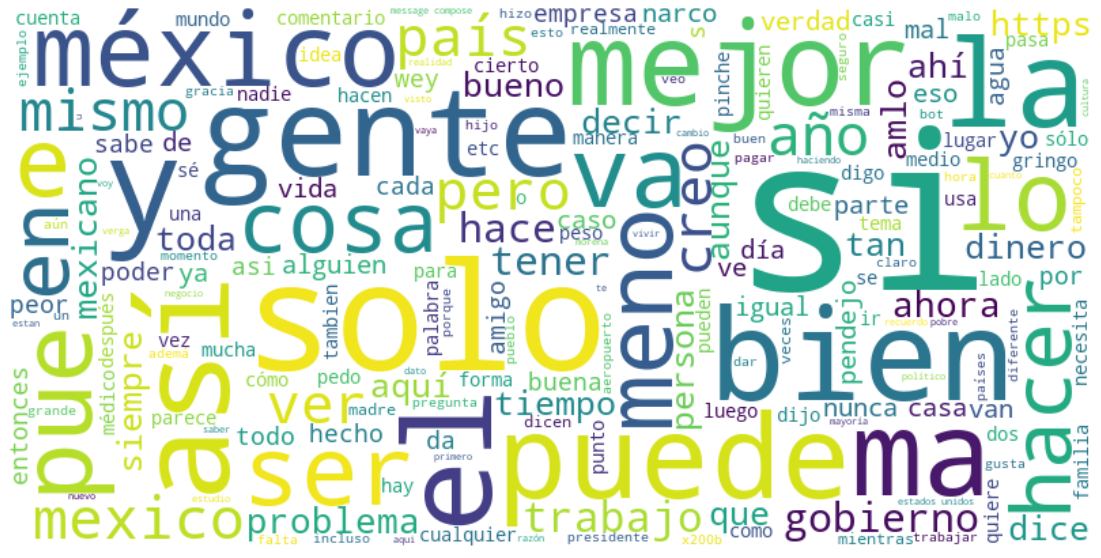

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

file = open('reddit.txt','r+')
text = file.readlines()
text = ' '.join(text)

text = tokenize_data(text)
text = remove_stop_words(text)
text = " ".join(text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('word-cloud.jpeg')

In [7]:
text = tokenize_data(text)
text = remove_stop_words(text)
text = normalize(text)
text = remove_garbage(text)
text = remove_whitespace(text)

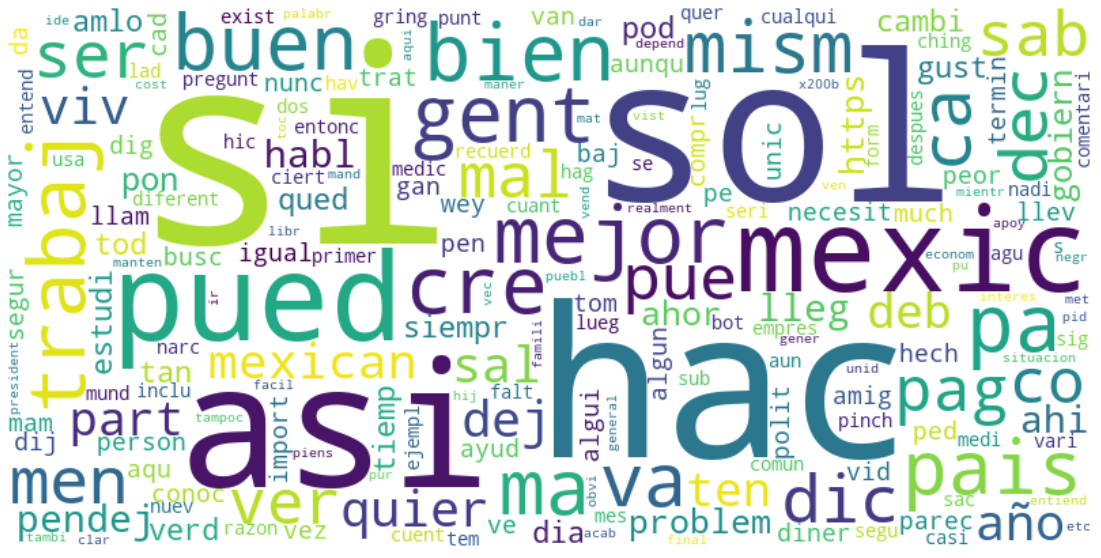

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

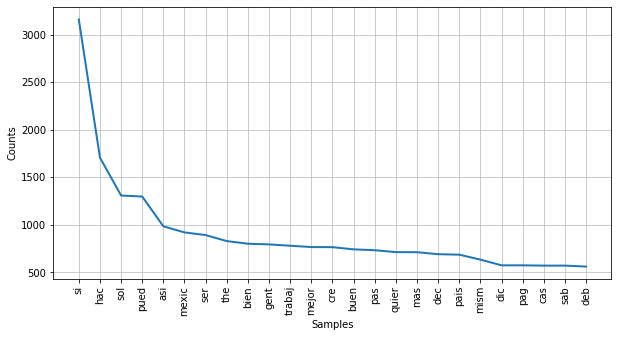

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
from matplotlib.pyplot import figure
%matplotlib inline

text_list = text.split(' ')

freqdist = nltk.FreqDist(text_list)

figure(figsize=(10,5))
freqdist.plot(25)